In [5]:
# 1. Eliminating Dodgy Images
!pip install tensorflow opencv-python matplotlib

In [6]:
import tensorflow as tf
import os

#import openCV
import cv2
#import imghdr to check file extensions
import imghdr

from matplotlib import pyplot as plt




In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
data_dir ='data'

In [8]:


for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)



In [9]:
import numpy as np
from matplotlib import pyplot as plt



In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')



Found 1026 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

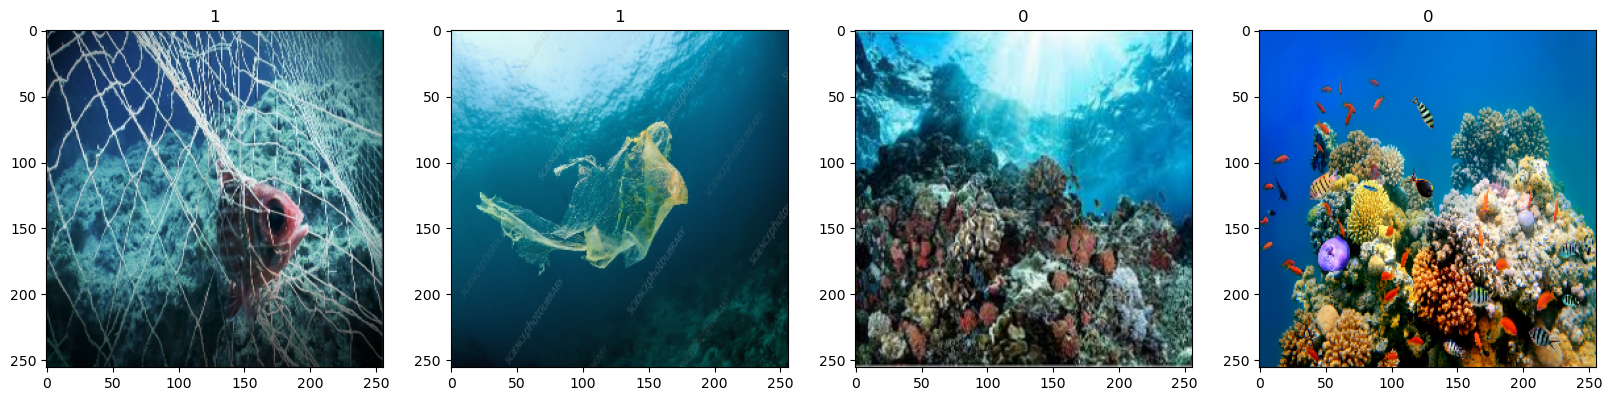

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[2.47320563e-01, 3.05592626e-01, 3.34146529e-01],
          [2.47058824e-01, 3.01960796e-01, 3.37254912e-01],
          [2.46221811e-01, 3.01123768e-01, 3.41932595e-01],
          ...,
          [2.37010881e-01, 3.08763325e-01, 3.44486386e-01],
          [2.29234636e-01, 3.03744435e-01, 3.31195414e-01],
          [2.47656256e-01, 3.14322919e-01, 3.52435648e-01]],
 
         [[2.47058824e-01, 3.01960796e-01, 3.37254912e-01],
          [2.46097937e-01, 3.00999910e-01, 3.36294025e-01],
          [2.37440765e-01, 2.92342722e-01, 3.33151549e-01],
          ...,
          [2.37124696e-01, 3.08877140e-01, 3.44600171e-01],
          [2.48377666e-01, 3.22887480e-01, 3.50338459e-01],
          [2.40000650e-01, 3.06667298e-01, 3.38039875e-01]],
 
         [[2.47058824e-01, 3.01960796e-01, 3.37254912e-01],
          [2.49325976e-01, 3.04227948e-01, 3.39522064e-01],
          [2.45593622e-01, 3.00495595e-01, 3.35789710e-01],
          ...,
          [2.51275986e-01, 3.23028445e-01, 3.5875

In [16]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size



23

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:


model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [22]:
# 5. Train

logdir='logs'
#from keras.callbacks import EarlyStopping

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])



Epoch 1/20
23/23 [==============================] - 37s 1s/step - loss: 0.6883 - accuracy: 0.7351 - val_loss: 0.3716 - val_accuracy: 0.8490
Epoch 2/20
23/23 [==============================] - 32s 1s/step - loss: 0.4260 - accuracy: 0.8234 - val_loss: 0.3617 - val_accuracy: 0.8438
Epoch 3/20
23/23 [==============================] - 37s 1s/step - loss: 0.3718 - accuracy: 0.8587 - val_loss: 0.2840 - val_accuracy: 0.9062
Epoch 4/20
23/23 [==============================] - 52s 2s/step - loss: 0.3506 - accuracy: 0.8641 - val_loss: 0.3283 - val_accuracy: 0.8750
Epoch 5/20
23/23 [==============================] - 49s 2s/step - loss: 0.2960 - accuracy: 0.8859 - val_loss: 0.2784 - val_accuracy: 0.9115
Epoch 6/20
23/23 [==============================] - 35s 1s/step - loss: 0.2237 - accuracy: 0.9266 - val_loss: 0.1687 - val_accuracy: 0.9531
Epoch 7/20
23/23 [==============================] - 20s 810ms/step - loss: 0.1829 - accuracy: 0.9416 - val_loss: 0.1794 - val_accuracy: 0.9323
Epoch 8/20
23/23 

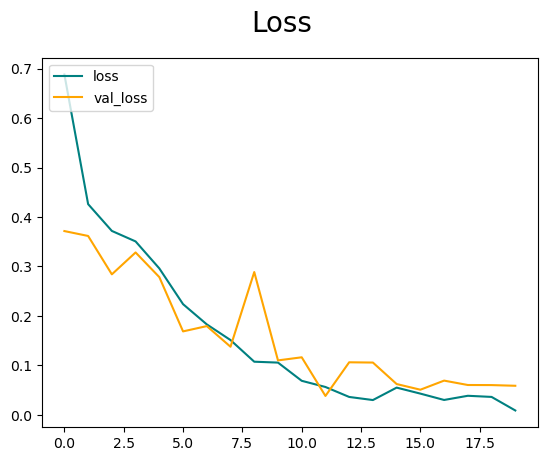

In [23]:
# 6. Plot Performance

hist.history['val_loss']

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()



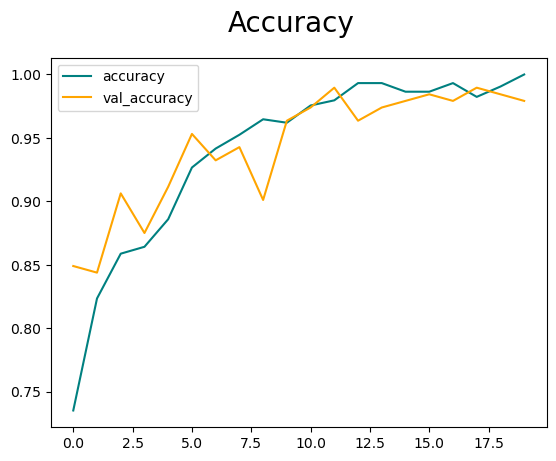

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()



In [26]:
#!pip install scikit-learn

'''import sklearn
from sklearn import metrics

f1_score = metrics.f1_score(actual, predicted)
precision = metrics.precision_score(actual, predicted)
recall = metrics.recall_score(actual, predicted)

print("F1 score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
'''

import sklearn
from sklearn import metrics
import numpy as np

# Evaluate the Model
y_true = np.concatenate([y for x, y in test], axis=0)
y_pred_prob = np.squeeze(model.predict(test))
y_pred = (y_pred_prob > 0.5).astype(int)

f1_score = metrics.f1_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)

print("F1 score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

3/3 [==============================] - 6s 97ms/step
F1 score: 0.830188679245283
Precision: 0.88
Recall: 0.7857142857142857


In [27]:
import cv2
import tensorflow as tf

***Original image***


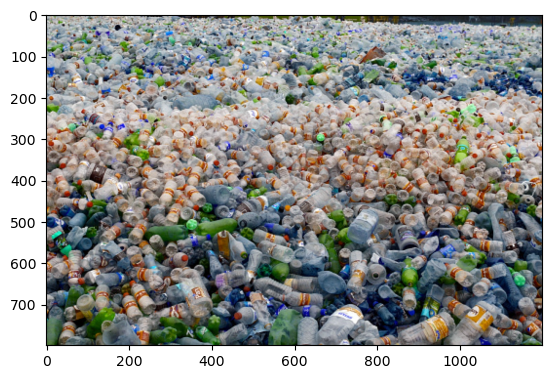

***Resized image***


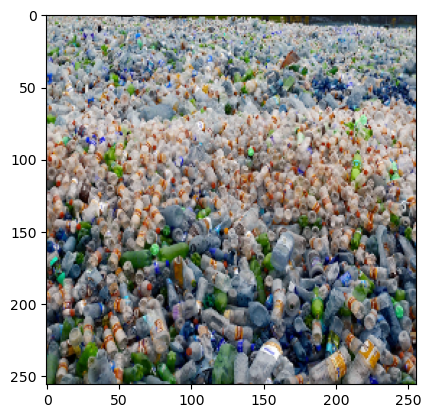

1/1 [==============================] - 0s 31ms/step

***Model Prediction confidence***
[[0.9996401]]

Predicted class is Plastic


In [39]:
#lOAD IMAGE
print("***Original image***")
img = cv2.imread('test1.jpg')
plt.imshow(img)
plt.show()
print("***Resized image***")
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
print()
print("***Model Prediction confidence***")
print(yhat)
print()
if yhat > 0.6: 
    print(f'Predicted class is Plastic')
else:
    print(f'Predicted class is Not Plastic')

***Original image***


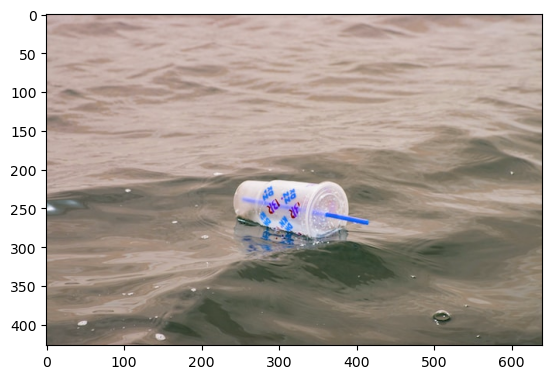

***Resized image***


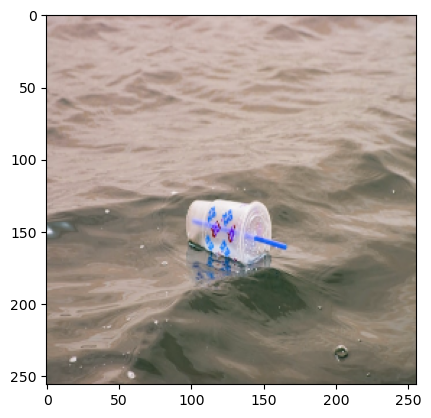

1/1 [==============================] - 0s 34ms/step

***Model Prediction confidence***
[[0.97494835]]

Predicted class is Plastic


In [29]:
#lOAD IMAGE
print("***Original image***")
img = cv2.imread('test2.jpg')
plt.imshow(img)
plt.show()
print("***Resized image***")
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
print()
print("***Model Prediction confidence***")
print(yhat)
print()
if yhat > 0.6: 
    print(f'Predicted class is Plastic')
else:
    print(f'Predicted class is Not Plastic')

In [30]:
from tensorflow.keras.models import load_model


In [31]:
model.save(os.path.join('models','plastocean.h5'))


In [32]:
new_model = load_model('models/plastocean.h5')


In [33]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 82ms/step


array([[0.97494835]], dtype=float32)